In [17]:
import numpy as np
from orphics import maps, cosmology,io,stats
import matplotlib.pyplot as plt

from scipy import optimize
import cosmo_cleaner
from cosmo_cleaner import fisher as fisher,plot
import camb
from cosmo_cleaner import cosmology
from cosmo_cleaner import triangle_plot
import camb
from camb import model, initialpower

def get_der(spectra,pars,delta,lensingzmin,cleaned=False):
    """derivative function used for fisher"""
    der_spectra_alpha = np.ones((len(list(spectra.items())[0][1]), len(spectra), len(pars)))
    for i in range(len(pars)):
        print(f"Taking field derivatives wrt {pars[i]}")
        der=cosmology.derivative_lensing(ells,1,0.5,defaultCosmology,pars[i],delta[i],nz=1000,kmax=10,zmin=0,zlensing=lensingzmin,idealised=False)

        der_spectra_alpha[:, 0, i] = der[:cut] #kk
    return der_spectra_alpha

In [5]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.2,'bias':1,'A_e':1.,'A_l':1.,'omega_k':0}
for i in range(17):
    defaultCosmology[f'lsst_bias{i}']=1

nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)
parsde.set_for_lmax(3000)

parsde = camb.CAMBparams()
parsde.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')
parsde.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
parsde.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
resultsde = camb.get_results(parsde)
defaultde=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,parsde,resultsde)

NameError: name 'parsde' is not defined

In [6]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.set_for_lmax(3000)
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
results = camb.get_results(pars)
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)

In [100]:
parameters = np.array( ['ombh2', 'omch2', 'H0',  'As', 'ns', 'tau','mnu'])
centers = np.array([0.02225,  0.1198,  67.3,  2.2e-9, 0.9645, 0.06, 0.06])
left_steps = np.array([0.0008, 0.003,   2,   0.1e-9, 0.010, 0.02, 0.0])
right_steps = np.array([0.0008, 0.003,   2,   0.1e-9, 0.010, 0.02, 0.02])
delta=[]
for i in range(len(left_steps)):
    delta.append((left_steps[i],right_steps[i]))

In [166]:
zmin=[0,0.01,0.02,0.1,0.15,0.2,0.3,0.35,0.4,0.45,0.5]
clkks=[]
clkkdes=[]
for i in range(len(zmin)):
    clkkdes.append(defaultde.get_clkk(zmin=zmin[i]))
    clkks.append(default.get_clkk(zmin=zmin[i]))

In [49]:
clkk_der[:,0].shape

(600, 7)

In [67]:
clkk_der

array([], dtype=float64)

In [103]:
clkk_der=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivative{zmin[i]}.npy")




In [104]:
clkk_der

array([[[ 1.64723226e-08,  2.45844648e-10,  4.63267630e-11, ...,
         -2.70672094e-08, -1.68424236e-13,  3.86905700e-11]],

       [[ 1.00471533e-08, -2.82605624e-08,  9.71667113e-11, ...,
         -8.90721936e-08, -5.94598646e-12,  1.88643445e-10]],

       [[ 1.86417364e-08, -4.21929063e-08,  1.51745675e-10, ...,
         -1.28745091e-07, -2.23860452e-11,  4.79515713e-10]],

       ...,

       [[-2.97205141e-07,  3.32800550e-07, -1.84030795e-10, ...,
          1.38535492e-08, -2.94876222e-11, -9.58508803e-09]],

       [[-2.96701120e-07,  3.32139004e-07, -1.83624871e-10, ...,
          1.38546245e-08, -2.94211238e-11, -9.56306194e-09]],

       [[-2.96198398e-07,  3.31479553e-07, -1.83220115e-10, ...,
          1.38555979e-08, -2.93548664e-11, -9.54111573e-09]]])

In [105]:
fishermatrix=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshiftsfisher{zmin[0]}.npy")
cov=np.linalg.inv(fishermatrix)
error=np.sqrt(np.diag(cov))

In [106]:
error[-1]*1000

677.3866700194365

In [120]:
fisher

array([[nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan]])

In [119]:
errore[-1]*1000

nan

In [7]:
def parshift_lensing(fisher,derivative,fiducial,newcl,noise=None,f_sky=0.4):
    if noise is None:
        noise=np.zeros(len(fiducial))
    ells=np.arange(cut)
    deltaclkk=(newcl-fiducial)    
    fac=deltaclkk/(fiducial+noise)**2
    var=np.nansum(fac*f_sky*(2*ells+1)*0.5*derivative,axis=1)
    bias=np.dot(np.linalg.inv(fisher),var)
    return bias

In [56]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -0.9
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.1,'bias':1,'A_e':1.,'A_l':1.,'omega_k':0}
for i in range(17):
    defaultCosmology[f'lsst_bias{i}']=1
nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)
parsde = camb.CAMBparams()
parsde.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
parsde.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')

parsde.set_for_lmax(3000)
parsde.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
resultsde = camb.get_results(parsde)
defaultde=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,parsde,results)

In [57]:
defaultCosmology = {'omch2': 0.1198
                    ,'ombh2': 0.02225
                    ,'H0': 67.3
                    ,'ns': 0.9645
                    ,'As': 2.2e-9
                    ,'mnu': 0.06
                    ,'w0': -1
                    ,'tau':0.06
                    ,'nnu':3.046
                    ,'wa': 0.,'bias':1,'A_e':1.,'A_l':1.,'omega_k':0}
for i in range(17):
    defaultCosmology[f'lsst_bias{i}']=1
nz = 1000
kmax = 10
zmin = 0.
ells=np.arange(2000)
pars = camb.CAMBparams()
pars.set_cosmology(H0=defaultCosmology['H0'], cosmomc_theta = None,ombh2=defaultCosmology['ombh2'], 
               omch2=defaultCosmology['omch2'], mnu=defaultCosmology['mnu'], tau = defaultCosmology['tau'],
               nnu = defaultCosmology['nnu'], num_massive_neutrinos = 3)
#pars.NonLinear = model.NonLinear_both
pars.set_dark_energy(w=defaultCosmology['w0'],wa = defaultCosmology['wa'], dark_energy_model = 'ppf')

pars.set_for_lmax(3000)
pars.InitPower.set_params(ns=defaultCosmology['ns'],As=defaultCosmology['As'])
results = camb.get_results(pars)
default=cosmology.cosmology(nz,kmax,zmin,ells,defaultCosmology,pars,results)

In [73]:
zmin=[0,0.2,0.3,0.35,0.4,0.45,0.5]
clkks=[]
clkkdes=[]
for i in range(len(zmin)):
    clkkdes.append(defaultde.get_clkk(zmin=zmin[i]))
    clkks.append(default.get_clkk(zmin=zmin[i]))

In [74]:
cut=600
dev=[]
biases=[]
for i in range(len(clkks)):
    fishermatrix=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/parshiftsfisher{zmin[i]}.npy")
    clkk_der=np.load(f"/global/homes/j/jia_qu/cosmo_cleaner/cosmo_cleaner/data/derivative{zmin[i]}.npy")[:,0]
    a=np.nansum(abs(clkks[0]-clkkdes[i]))
    dev.append(a)
    fiducial=clkks[i][:cut]
    newcl=clkkdes[i][:cut]
    bias=parshift_lensing(fishermatrix,clkk_der.transpose(),fiducial,newcl,noise=None,f_sky=1)
    biases.append(bias)
    
    
dev=np.array(dev)
biases=np.array(biases)
    
    

In [75]:
mnubias=[]
for i in range(len(biases)):
       mnubias.append(biases[i][-1]*1000)

Text(0.5, 0, 'zmin')

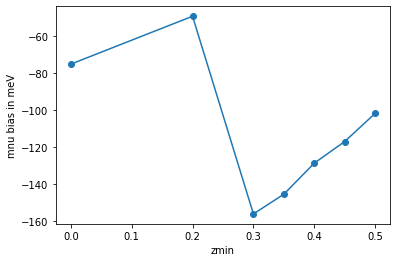

In [76]:
k=10
plt.plot(zmin[:k],mnubias[:k],'o-')
plt.ylabel('mnu bias in meV')
plt.xlabel('zmin')


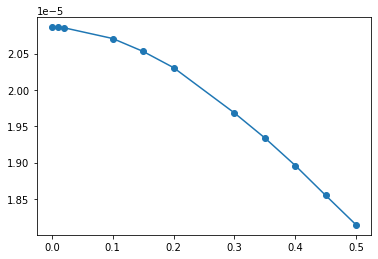

In [230]:

plt.plot(zmin,dev,'o-')